<a href="https://colab.research.google.com/github/RaihanDwiPratama/digital_image_processing/blob/main/praktikum3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

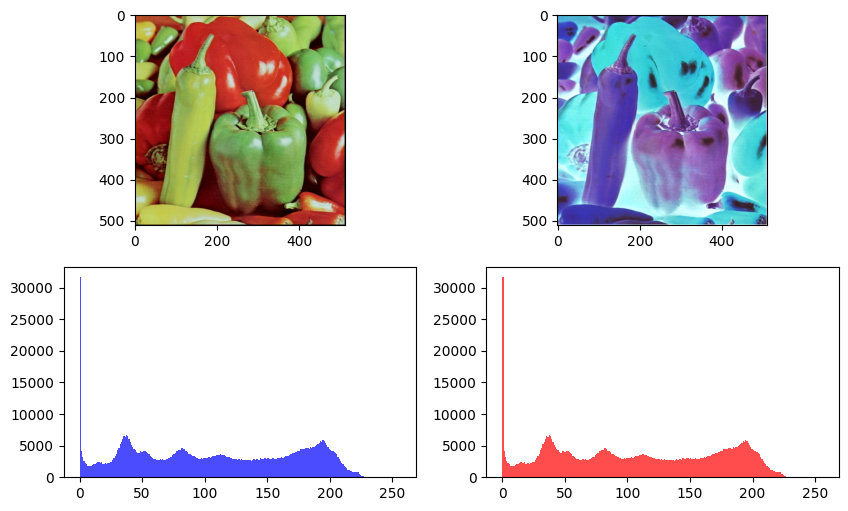

In [3]:
img_raw = cv2.imread('/content/drive/MyDrive/Footage/Footage/peppers3.tif', 1)

img = cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB)

img_neg = cv2.bitwise_not(img)

#menampilkan gambar
fig, axes = plt.subplots(2, 2, figsize=(10,6))

axes[0, 0].imshow(img)
axes[0, 1].imshow(img_neg)

axes[1, 0].hist(img.ravel(), 256, [0, 256], color='blue', alpha=0.7)
axes[1, 1].hist(img.ravel(), 256, [0, 256], color='red', alpha=0.7)

plt.show()

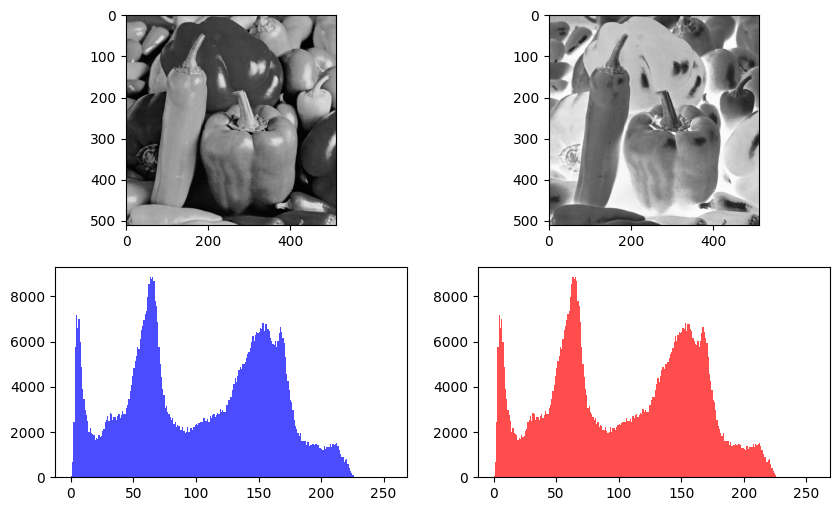

In [4]:
img_raw = cv2.imread('/content/drive/MyDrive/Footage/Footage/peppers2.tif', 1)

img = cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB)

img_neg = cv2.bitwise_not(img)

#menampilkan gambar
fig, axes = plt.subplots(2, 2, figsize=(10,6))

axes[0, 0].imshow(img)
axes[0, 1].imshow(img_neg)

axes[1, 0].hist(img.ravel(), 256, [0, 256], color='blue', alpha=0.7)
axes[1, 1].hist(img.ravel(), 256, [0, 256], color='red', alpha=0.7)

plt.show()

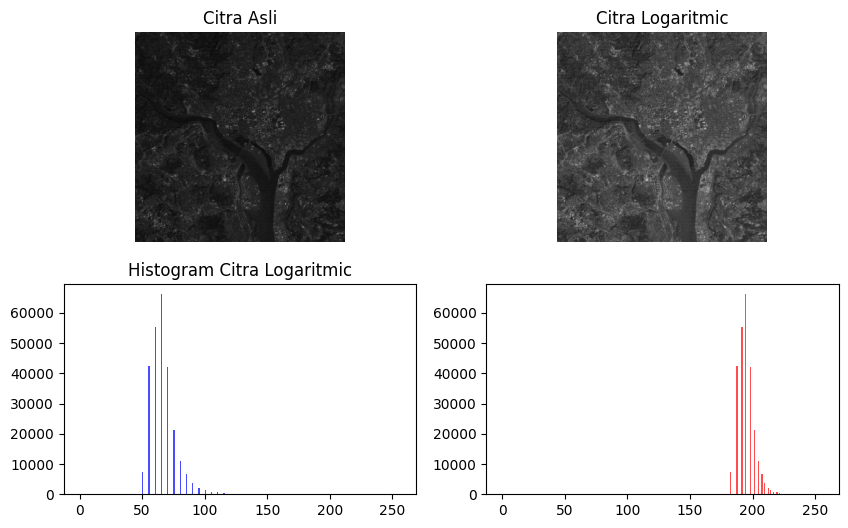

In [7]:
image = cv2.imread('/content/drive/MyDrive/Footage/Footage/washsat.tif', 0)

c = 255 / np.log(1 + np.max(image))
log_image = c * (np.log(image + 1))

log_image = np.array(log_image, dtype = np.uint8)

fig, axes = plt.subplots(2, 2, figsize = (10,6))

axes[0, 0].imshow(image, cmap = "gray")
axes[0, 0].set_title("Citra Asli")
axes[0, 0].axis("off")

axes[0, 1].imshow(log_image, cmap = "gray")
axes[0, 1].set_title("Citra Logaritmic")
axes[0, 1].axis("off")

axes[1, 0].hist(image.ravel(), 256, [0, 256], color='blue', alpha=0.7)
axes[1, 0].set_title("Histogram Gambar Asli")

axes[1, 1].hist(log_image.ravel(), 256, [0, 256], color='red', alpha=0.7)
axes[1, 0].set_title("Histogram Citra Logaritmic")

plt.show()

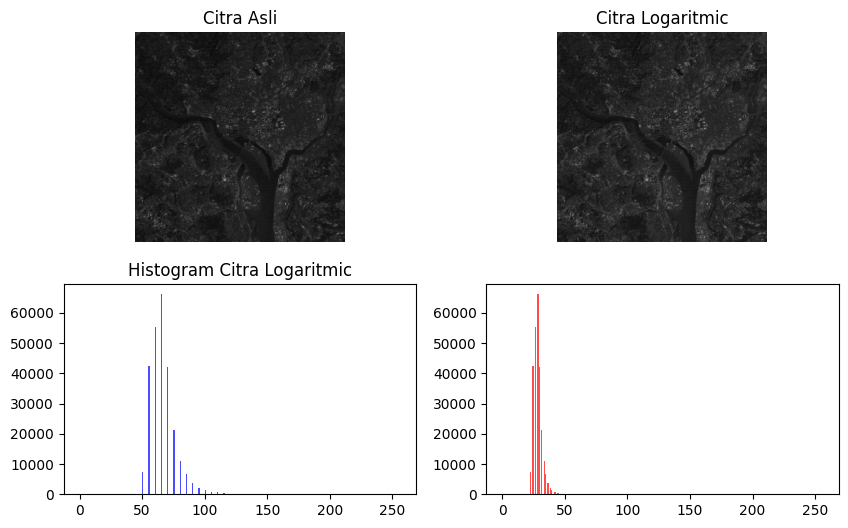

In [9]:
img = cv2.imread('/content/drive/MyDrive/Footage/Footage/washsat.tif',0)

gamma = 0.8
img_2 = np.power(img, gamma)

fig, axes = plt.subplots(2, 2, figsize = (10,6))

axes[0, 0].imshow(img, cmap = "gray")
axes[0, 0].set_title("Citra Asli")
axes[0, 0].axis("off")

axes[0, 1].imshow(img_2, cmap = "gray")
axes[0, 1].set_title("Citra Logaritmic")
axes[0, 1].axis("off")

axes[1, 0].hist(img.ravel(), 256, [0, 256], color='blue', alpha=0.7)
axes[1, 0].set_title("Histogram Gambar Asli")

axes[1, 1].hist(img_2.ravel(), 256, [0, 256], color='red', alpha=0.7)
axes[1, 0].set_title("Histogram Citra Logaritmic")

plt.show()

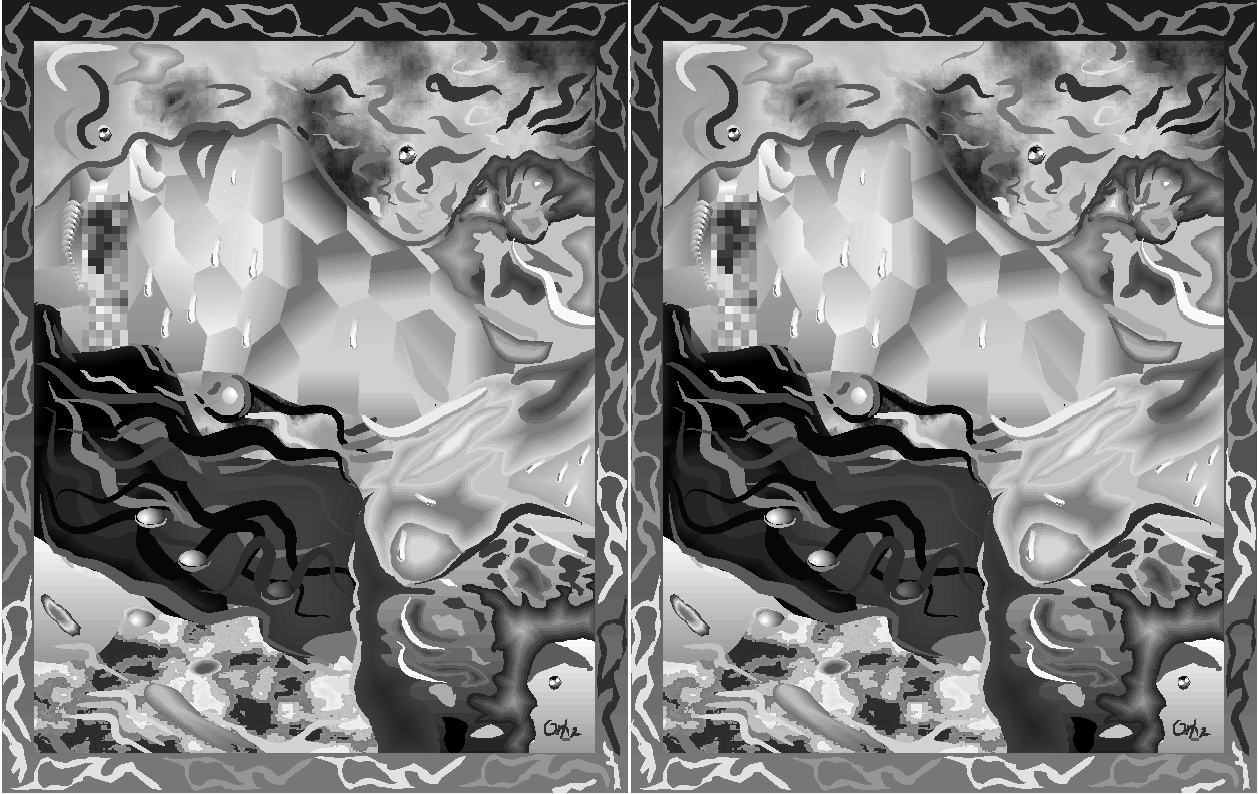

Text(0.5, 1.0, 'Histogram Gambar Contrast Stretching')

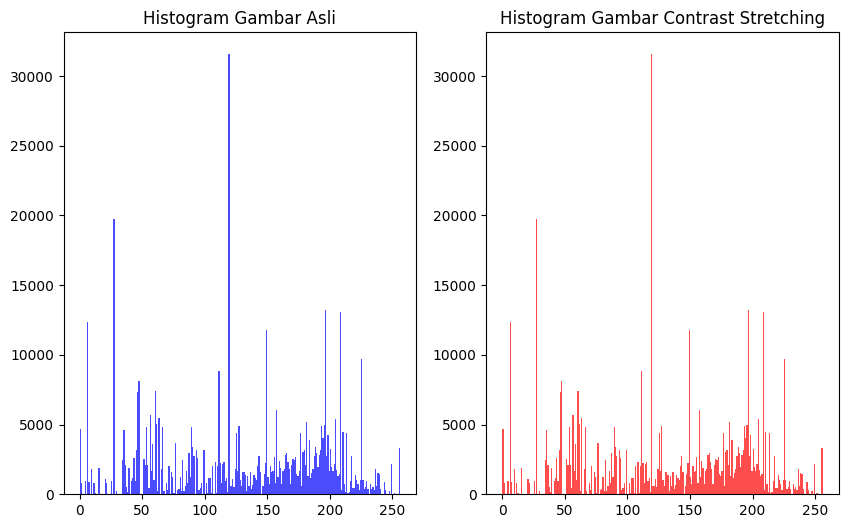

In [16]:
img1 = cv2.imread('/content/drive/MyDrive/Footage/Footage/serrano.tif', 0)

minmax_img = np.zeros((img1.shape[0], img1.shape[1]), dtype = 'uint8')

for i in range(img1.shape[0]):
  for j in range(img1.shape[1]):
    minmax_img[i, j] = 255*(img1[i,j]-np.min(img1))/(np.max(img1)-np.min(img1))

#menampilkan gambar
combined_image = cv2.hconcat([img1, minmax_img])
cv2_imshow(combined_image)

#histogram
fig, axes = plt.subplots(1, 2, figsize = (10,6))

axes[0].hist(img1.ravel(), 256, [0, 256], color='blue', alpha=0.7)
axes[0].set_title("Histogram Gambar Asli")

axes[1].hist(minmax_img.ravel(), 256, [0, 256], color='red', alpha=0.7)
axes[1].set_title("Histogram Gambar Contrast Stretching")

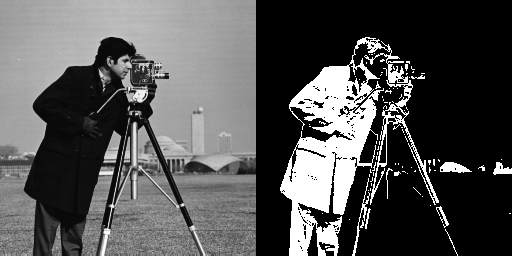

In [19]:
img = cv2.imread('/content/drive/MyDrive/Footage/Footage/camera.tif', 0)

row, column = img.shape

img1 = np.zeros((row, column), dtype = 'uint8')

min_range = 10
max_range = 60

for i in range(row):
  for j in range(column):
    if img[i,j]>min_range and img[i,j]<max_range:
      img1[i,j] = 255
    else:
      img1[i,j] = 0

combined_image = cv2.hconcat((img, img1))
cv2_imshow(combined_image)

In [20]:
def cov_binary(num):
    binary_num = [int(i) for i in list('{0:0b}'.format(num))]
    for j in range(8 - len(binary_num)):
        binary_num.insert(0,0)
    return binary_num
def conv_decimal(listt):
    x = 0
    for i in range(8):
        x = x + int(listt[i])*(2**(7-i))
    return x
def discriminate_bit(bit,img):
    z = np.zeros([225,225])
    for i in range(225):
        for j in range(225):
            x = cov_binary(img[i][j])
            for k in range(8):
                if k == bit:
                    x[k] = x[k]
                else:
                    x[k] = 0
            x1 = conv_decimal(x)
            z[i][j] = x1
    return z

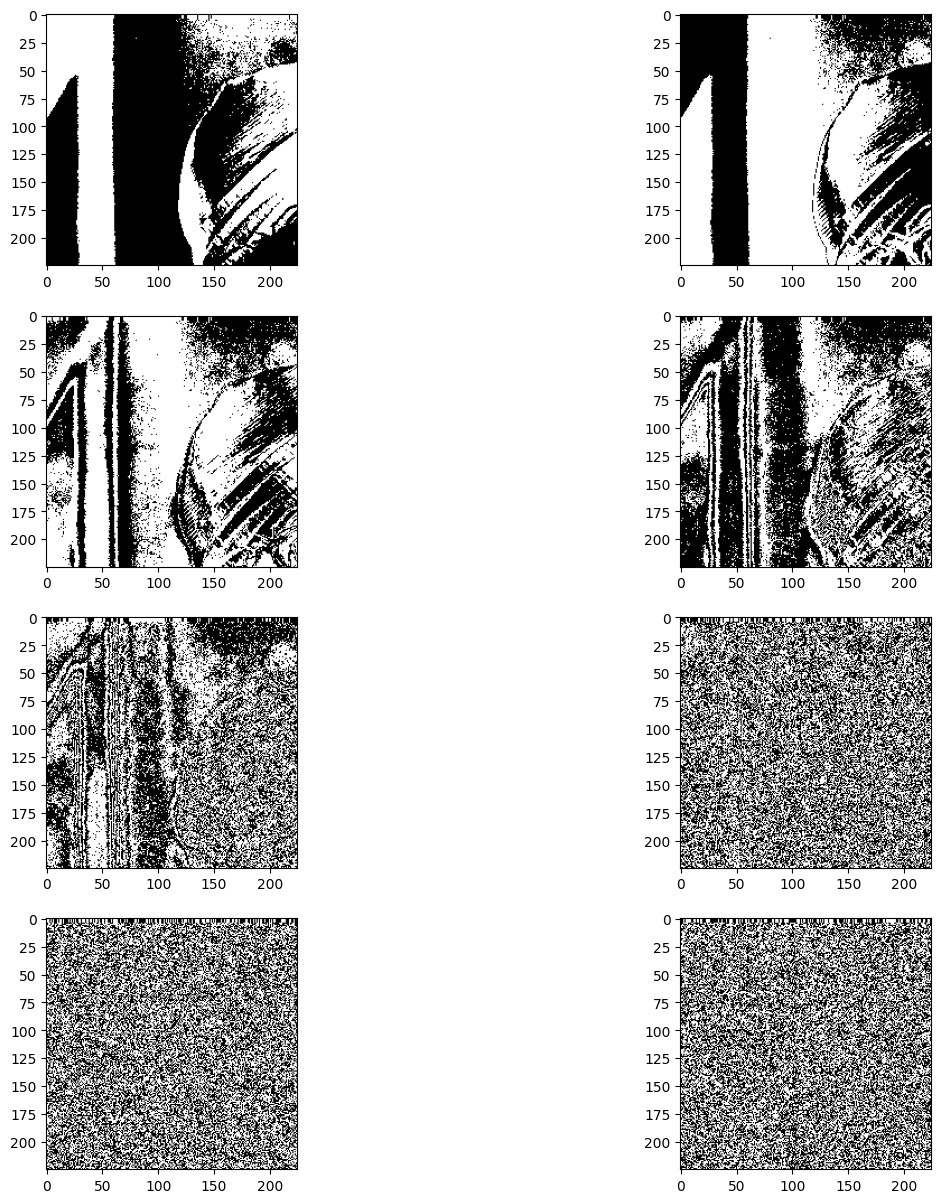

In [22]:
img = cv2.imread('/content/drive/MyDrive/Footage/Footage/lena3.tif',0)

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

for i in range(1,9):
  fig.add_subplot(4,2,i)
  plt.imshow(discriminate_bit(i-1, img), cmap='gray')

plt.show(block=True)

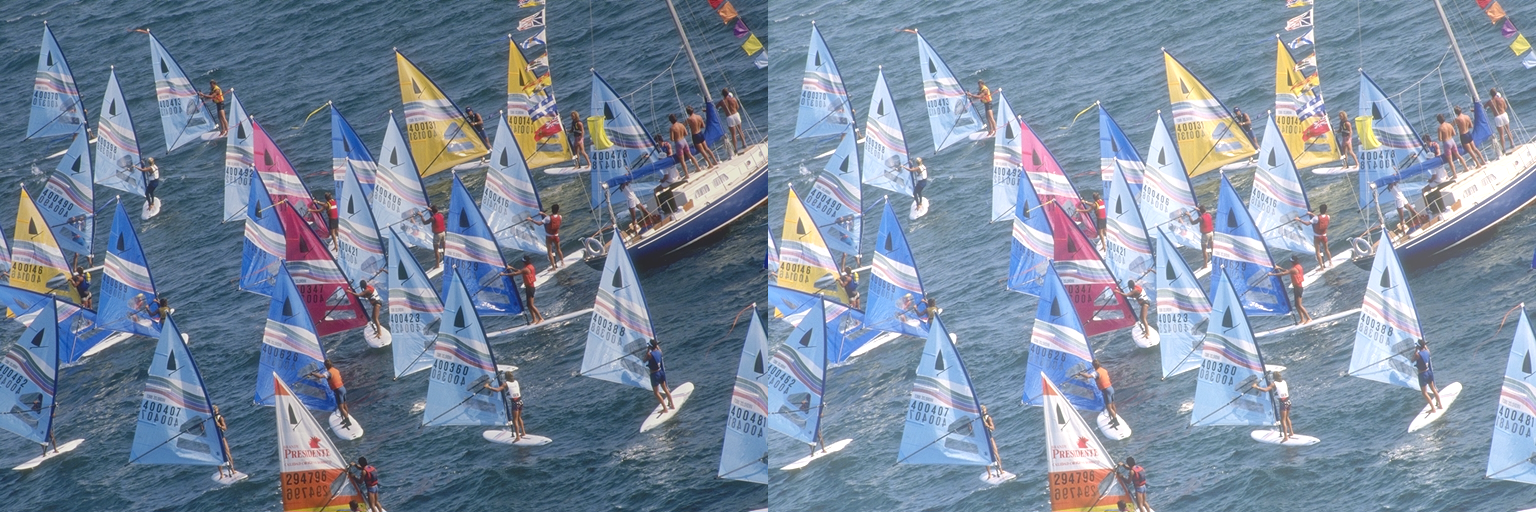

Text(0.5, 1.0, 'Histogram Gambar Contrast Brightness')

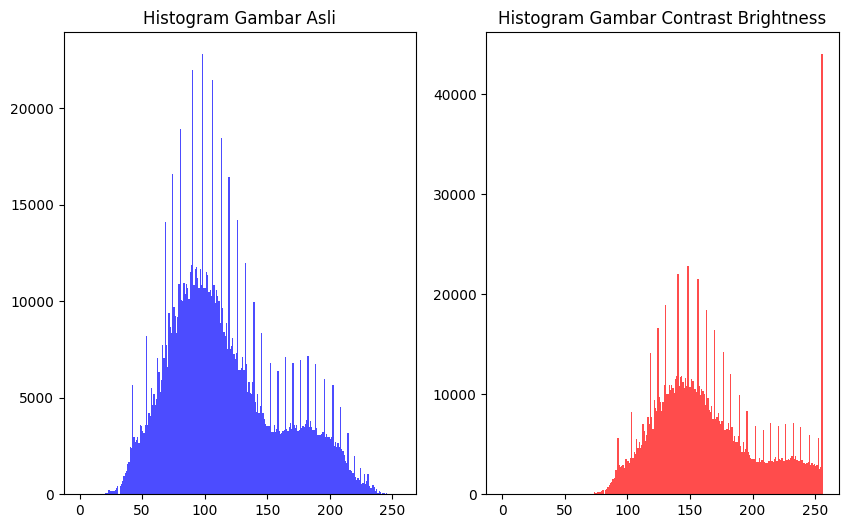

In [23]:
img = cv2.imread('/content/drive/MyDrive/Footage/Footage/sail.tif')
alpha = 1.0
beta = 50

img_bright = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

#menampilkan gambar.
combined_image = cv2.hconcat([img, img_bright])
cv2_imshow(combined_image)

#histogram
fig, axes = plt.subplots(1, 2, figsize = (10,6))

axes[0].hist(img.ravel(), 256, [0, 256], color='blue', alpha=0.7)
axes[0].set_title("Histogram Gambar Asli")

axes[1].hist(img_bright.ravel(), 256, [0, 256], color='red', alpha=0.7)
axes[1].set_title("Histogram Gambar Contrast Brightness")

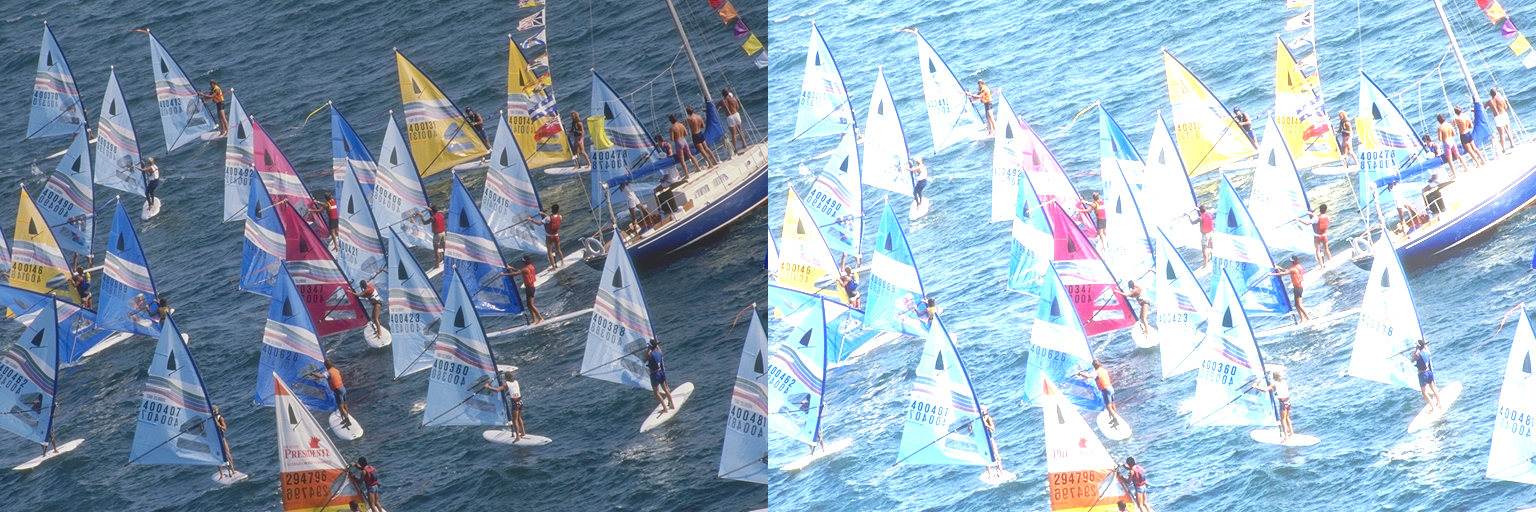

Text(0.5, 1.0, 'Histogram Gambar Contrast Brightness')

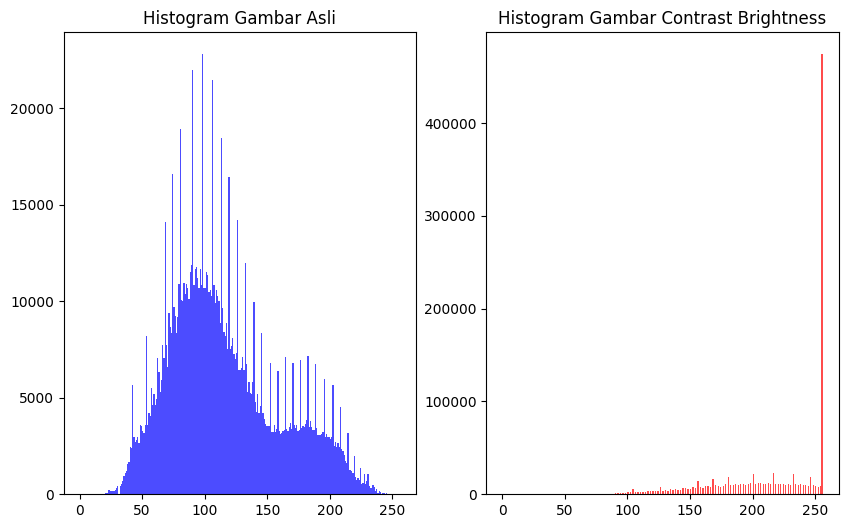

In [24]:
img = cv2.imread('/content/drive/MyDrive/Footage/Footage/sail.tif')
alpha = 2.0
beta = 20

img_bright = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

#menampilkan gambar.
combined_image = cv2.hconcat([img, img_bright])
cv2_imshow(combined_image)

#histogram
fig, axes = plt.subplots(1, 2, figsize = (10,6))

axes[0].hist(img.ravel(), 256, [0, 256], color='blue', alpha=0.7)
axes[0].set_title("Histogram Gambar Asli")

axes[1].hist(img_bright.ravel(), 256, [0, 256], color='red', alpha=0.7)
axes[1].set_title("Histogram Gambar Contrast Brightness")

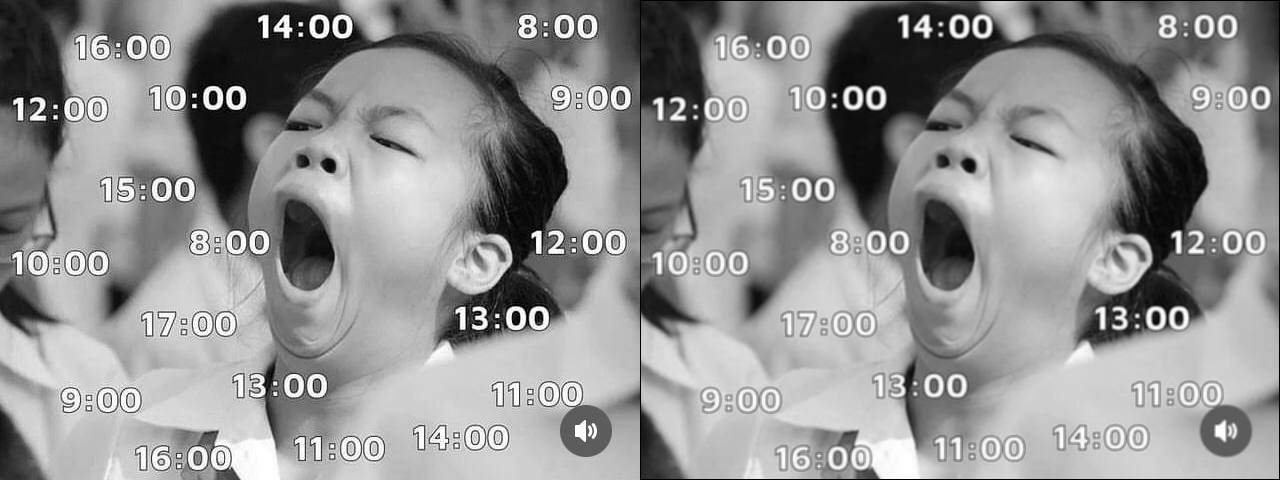

In [26]:
img = cv2.imread('/content/drive/MyDrive/Footage/Footage/nguap.jpg', 0)
m, n = img.shape

mask = np.ones([3, 3], dtype = int)
mask = mask / 9

img_new = np.zeros([m, n])

for i in range(1, m-1):
	for j in range(1, n-1):
		temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]

		img_new[i, j]= temp

img_new = img_new.astype(np.uint8)

combined_image = cv2.hconcat([img,img_new])
cv2_imshow(combined_image)

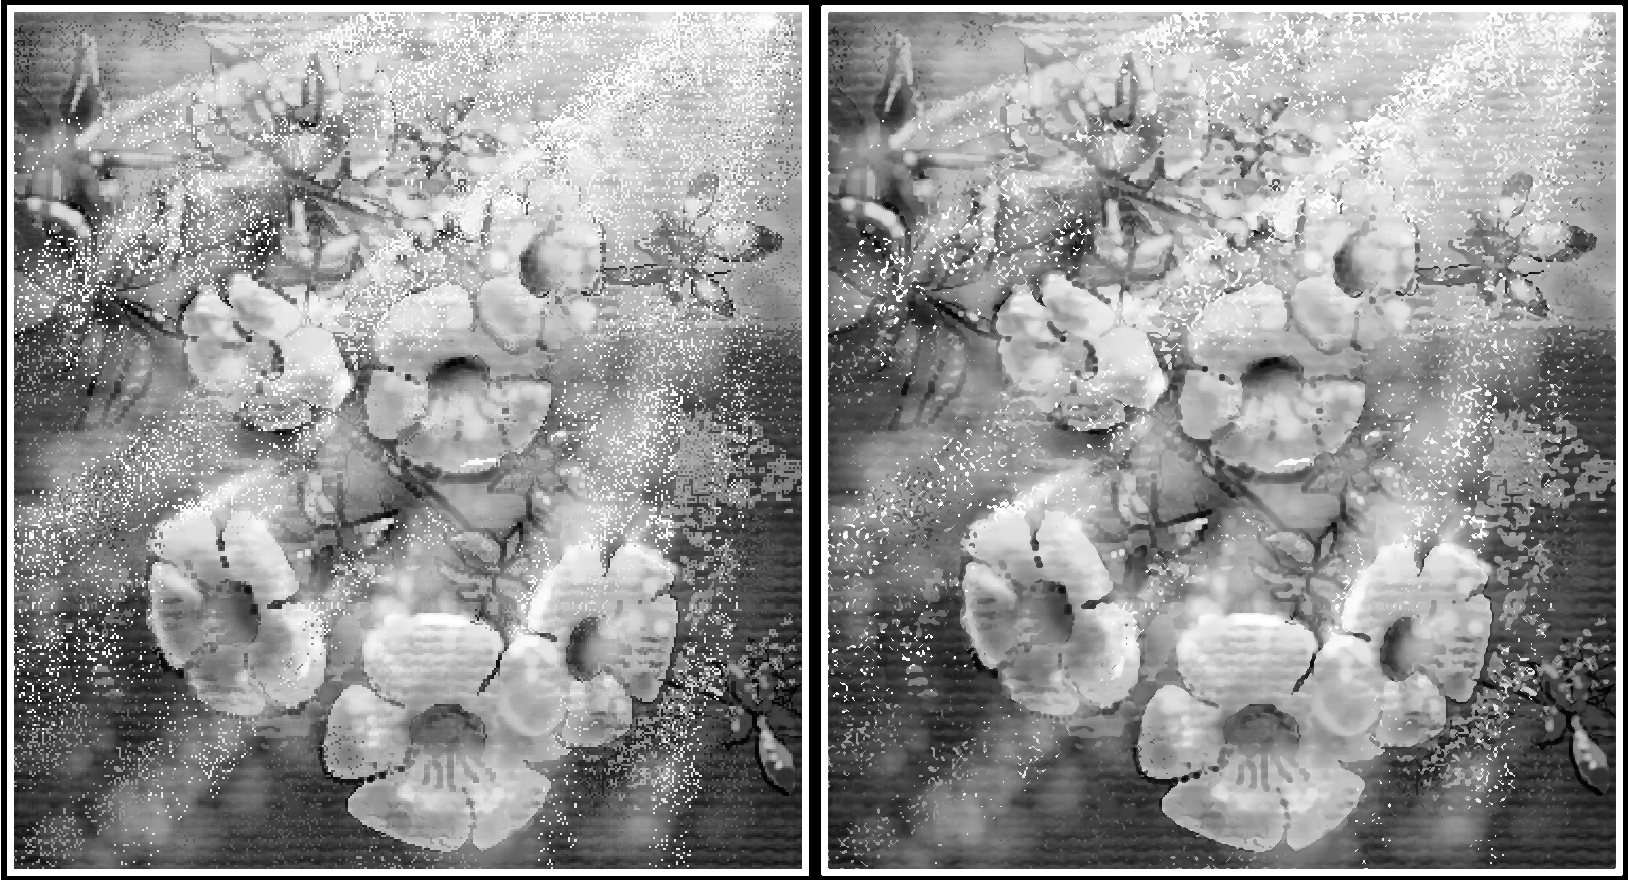

In [27]:
img_noisy1 = cv2.imread('/content/drive/MyDrive/Footage/Footage/clegg.tif', 0)

m, n = img_noisy1.shape

img_new1 = np.zeros([m, n])

for i in range(1, m-1):
	for j in range(1, n-1):
		temp = [img_noisy1[i-1, j-1],
			img_noisy1[i-1, j],
			img_noisy1[i-1, j + 1],
			img_noisy1[i, j-1],
			img_noisy1[i, j],
			img_noisy1[i, j + 1],
			img_noisy1[i + 1, j-1],
			img_noisy1[i + 1, j],
			img_noisy1[i + 1, j + 1]]

		temp = sorted(temp)
		img_new1[i, j]= temp[4]

img_new1 = img_new1.astype(np.uint8)
combined_image = cv2.hconcat([img_noisy1,img_new1])
cv2_imshow(combined_image)

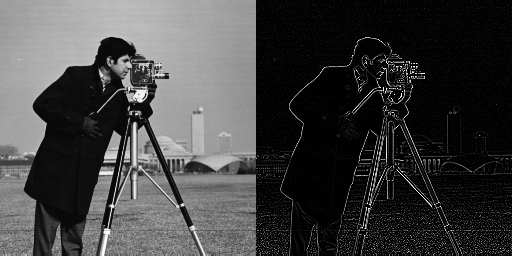

In [28]:
image = cv2.imread('/content/drive/MyDrive/Footage/Footage/camera.tif')

sharpened_image2 = cv2.Laplacian(image, cv2.CV_8U)

combined_image = cv2.hconcat([image, sharpened_image2])
cv2_imshow(combined_image)